# Project: Wrangle and Analyze Data

### Introduction
This project gather, assess, clean and present findings about dogs, The dataset used for this project is from the Twitter account @WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with humorous comments about the dog. The gathering stage involves getting data from different source namely: Through direct download, through progammatically download and through API. The data was thereafter assessed for inconsistencies, these issues where later cleaned, the cleaned data was later used to make analysis and drawn conclusions

## Data Gathering
Gathering the datasets

### Import necessary libraries

In [96]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# Read in the downloaded twitter-archive-enchanced.csv
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [98]:
# check the first five rows of the dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [99]:
# Accessing the content of the image_predictions.tsv hosted on Udacity server
image_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

images_content = requests.get(image_url)
images_content

<Response [200]>

In [100]:
# Writing the content of the url to a file
with open("image_predictions.tsv", mode="wb") as file:
    file.write(images_content.content)

In [101]:
# Reading the content of the image_prediction.tsv file to pandas DataFrame
image_prediction = pd.read_csv("image_predictions.tsv", sep="\t")

In [102]:
# Checking the first five rows of the dataframe
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [103]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except AttributeError:  #tweepy.errors.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [104]:
# Reading the Twitter API data line by line
tweet_json = "tweet-json.txt"
tweets = []
with open(tweet_json, mode= "r", encoding= "utf-8") as file:
    for line in file:
        tweets.append(json.loads(line))

In [105]:
# Converting the tweets to DataFrame
api_data = pd.DataFrame(tweets)

In [106]:
# Checking the first five rows of the dataframe
api_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assess

### Eight (8) quality issues and two (2) tidiness issues 

#### Visual Assessment
**Quality issues in the twitter_archive Dataframe**
  
  - Only original tweets will be accessed and cleaned (no retweets)
   - (1) Empty columns(missing values) i.e columns without values
   - (2) Duplication of values in the expanded_urls column (some rows duplicated values)
   - (3) Inconsistency in the name column some dogs start with uppercase while some start with lowercase
  


 **Quality issues in the image_prediction Dataframe**

 - (4) Inconsistency in the names in columns(p1, p2, p3) some names starts with Uppercase while some start with lowercase letters
  - (5) underscore character joining two letters together in columns(p1, p2, p3)

 **Quality issues in the api_data Dataframe**
   - (6) Empty columns (missing values) i.e columns without values

**Tidiness issues in the twitter_archive Dataframe**
  -  (1) Dogs stage names are columns instead of rows

**Tidiness issues in the api_data Dataframe**

## Programmatic Assessment.

- The data type of timestamp column was object instead of datetime data type

## Before Programmatic assessment (Only original tweets will be assessed)

#### Define
Only original tweets will be accessed and cleaned (no retweets)
  - Drop all columns containing retweets and replies in the each dataframe

In [107]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Code

In [108]:
twitter_archive = twitter_archive.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)

#### Test

In [109]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [110]:
# These are the sum of the null values in the twitter_archive dataframe 
twitter_archive.isna().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

In [111]:
# Checking random 5 samples of the dateframr to detect quality issues
twitter_archive.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
557,803380650405482500,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sonny. He's an in-home movie critic. That...,https://twitter.com/dog_rates/status/803380650...,12,10,Sonny,None,None,None,None
72,878604707211726852,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
217,850380195714523136,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,None,None,None,None
1813,676776431406465024,2015-12-15 14:50:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",https://twitter.com/dog_rates/status/676776431...,10,10,None,None,None,None,None
1752,678969228704284672,2015-12-21 16:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. She's a Metamorphic Chartreuse. Pla...,https://twitter.com/dog_rates/status/678969228...,11,10,Lola,None,None,None,None


In [112]:
# Statistical describution of the numerical columns to check distribution
twitter_archive.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.356000e+03,2356.000000,2356.000000
mean,7.427716e+17,13.126486,10.455433
std,6.856705e+16,45.876648,6.745237
min,6.660209e+17,0.000000,0.000000
25%,6.783989e+17,10.000000,10.000000
50%,7.196279e+17,11.000000,10.000000
75%,7.993373e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


In [113]:
# checking the shape of the dataframe
twitter_archive.shape

(2356, 12)

In [114]:
# checking to the unique tweets in the dataframe
twitter_archive.tweet_id.nunique()

2356

In [115]:
# There is no duplicated data in the twitter_archive dataframe
twitter_archive[twitter_archive.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Assessing the Image prediction dataframe Programmatically

In [116]:
# checking the first three rows
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [117]:
# Checking that the data types are correct
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [118]:
# The image_prediction dataframe have no missing values
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [119]:
# checking the statistical distribution of the numeric columns of the daaframe
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [120]:
# Checking the shape of the dataframe
image_prediction.shape

(2075, 12)

In [121]:
# The dataframe doesn't have duplicate values
image_prediction[image_prediction.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Assessing the Tweeter API dataframe Programmatically
Looking at the summary of the api_data DataFrame returned by the .info()method you can see that all the columns (in_reply_to_...,) and some others have null values.

### Define
- Only original tweets will be accessed and cleaned (no retweets)
 - Drop all columns containing retweets and replies in the each dataframe

In [122]:
api_data.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

#### Code

In [123]:
api_data = api_data.drop(["in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str",
                         "in_reply_to_screen_name", "retweeted", "retweeted_status"], axis=1)

In [124]:
# Checking the through the first three rows
pd.set_option("display.max_column", 1000)
api_data.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,en,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514,33819,False,False,False,en,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328,25461,False,False,False,en,NaN,NaN,NaN


#### Test

In [125]:
# Checking that the data types are correct
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   user                           2354 non-null   object 
 10  geo                            0 non-null      object 
 11  coordinates                    0 non-null      object 
 12  place                          1 non-null      o

In [126]:
# sum of the null values in the columns
api_data.isna().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang                                0
quoted_status_id                 2325
quoted_status_id_str             2325
quoted_status                    2326
dtype: int64

In [127]:
# Checking the statistical distribution of the dataset
api_data.describe()

,id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,79515.000000,132810.000000,8.860534e+17


In [128]:
# Checking the shape of the dataset
api_data.shape

(2354, 24)

Two more quality issue detected during programmatic assessment
 - The data type of timestamp column in the twitter archive DataFrame was object instead of datetime data type
 - The values in (display_text_range) column of api_data Dataframe is enclosed by square brackeks and has comma in between

#### Complete Assessment
**Quality issues in the twitter_archive Dataframe**
   - (1) Only original tweets will be accessed and cleaned (no retweets)
   - (2) Empty columns(missing values) i.e columns without values
   - (3) Duplication of values in the expanded_urls column (some rows duplicated values)
   - (4) Inconsistency in the name column some dogs start with uppercase while some start with lowercase
   - (5) timestamp column data type is object instead of datetime data type
  


 **Quality issues in the image_prediction Dataframe**

 - (6) Inconsistency in the names in columns(p1, p2, p3) some names starts with Uppercase while some start with lowercase letters
 - (7) underscore character joining two letters together in columns(p1, p2, p3)

**Quality issues in the api_data Dataframe**
 
 - (8) Empty columns (missing values) i.e columns without values
 - (9) The values in (display_text_range) column of api_data Dataframe is enclosed by square brackeks and has comma in between
 - Remove all retweets and reply columns in the dataset

**Tidiness issues in the twitter_archive Dataframe**
 - (1) Dogs stage names are columns instead of rows

**Tidiness issues in the api_data Dataframe**
 - (2) Repetition of values in the "extended_entities" column that are already present in  "entities" column

## Clean

In [129]:
# creating a copy of the datasets
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
api_data_clean = api_data.copy()

### Cleaning Missing values first
 - Empty columns(missing values) i.e columns without values in the twitter archive dataframe
 - Empty columns (missing values) i.e columns without values in the api data dataframe

#### Define
Check the percentage of the missing values, drop columns that have more than 50% null values, fill the columns with less 50% null values with the column mean


#### Code


In [130]:
# Get sum of null values gor twitter archive dataframe
sum_null = twitter_archive_clean.isnull().sum()


In [131]:
sum_null2 = api_data_clean.isnull().sum()


In [132]:
# Divide by total number of values and multiply by 100 to get percentage of missing values for twitter archive dataframe
null_percentage = sum_null / len(twitter_archive_clean) * 100
null_percentage

tweet_id              0.000000
timestamp             0.000000
source                0.000000
text                  0.000000
expanded_urls         2.504244
rating_numerator      0.000000
rating_denominator    0.000000
name                  0.000000
doggo                 0.000000
floofer               0.000000
pupper                0.000000
puppo                 0.000000
dtype: float64

In [133]:
# # Divide by total number of values and multiply by 100 to get percentage of missing values for api_data dataframe
null_percentage2 = sum_null2 / len(api_data_clean) * 100
null_percentage2

created_at                         0.000000
id                                 0.000000
id_str                             0.000000
full_text                          0.000000
truncated                          0.000000
display_text_range                 0.000000
entities                           0.000000
extended_entities                 11.937128
source                             0.000000
user                               0.000000
geo                              100.000000
coordinates                      100.000000
place                             99.957519
contributors                     100.000000
is_quote_status                    0.000000
retweet_count                      0.000000
favorite_count                     0.000000
favorited                          0.000000
possibly_sensitive                 6.074766
possibly_sensitive_appealable      6.074766
lang                               0.000000
quoted_status_id                  98.768054
quoted_status_id_str            

In [134]:
# Create a list of columns with atleast 50% null values for twitter archive dataframe
atleast_50_percent_null = []
for index, value in null_percentage.items():
    if value >= 50:
        atleast_50_percent_null.append(index)

In [135]:
# Create a list of columns with atleast 50% null values for api_data dataframe
atleast_50_percent_null2 = []
for index, value in null_percentage2.items():
    if value >= 50:
        atleast_50_percent_null2.append(index)

In [136]:
# drop columns with atleast 70% null values for twitter archive dataframe
twitter_archive_clean.drop(columns=(atleast_50_percent_null), axis=1, inplace=True)

In [137]:
# drop columns with atleast 70% null values for api_data dataframe
api_data_clean.drop(columns=(atleast_50_percent_null2), axis=1, inplace=True)

In [138]:
# for those with less than 50% rows nulls, replace with the mean of the column 

def myfillna(series):
    """This function checks the datatype of the column and fill the null values with its mean for integer and float
    datatypes and NOT available for string datatypes"""
    if series.dtype is np.dtype(int):
        return series.fillna(series.mean())
    if series.dtype is np.dtype(float):
        return series.fillna(series.mean())
    if series.dtype is np.dtype("O"):
        return series.fillna("Not Available")
    else:
        return series

In [139]:
# Applying myfillna function
twitter_archive_clean = twitter_archive_clean.apply(myfillna)

In [140]:
# Applying myfillna function to api_data_clean
api_data_clean = api_data_clean.apply(myfillna)

### Test

In [141]:
twitter_archive_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [142]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [143]:
api_data_clean.isna().sum()

created_at                       0
id                               0
id_str                           0
full_text                        0
truncated                        0
display_text_range               0
entities                         0
extended_entities                0
source                           0
user                             0
is_quote_status                  0
retweet_count                    0
favorite_count                   0
favorited                        0
possibly_sensitive               0
possibly_sensitive_appealable    0
lang                             0
dtype: int64

In [144]:
api_data_clean.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,en


### Tidiness 
Every column must be a variable and every row must be an observation 

1. Dogs stage names in the twitter_archive dataframe are columns instead of rows

#### Define
Melt the four dog stage name into a dog_stage column

### Code

In [145]:
# # melt dog stage columns into dog_stage
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=["tweet_id", "timestamp", "source", "text", "expanded_urls", "rating_numerator",
                                        "rating_denominator", "name"], var_name="dog_stage")

# # Drop the value column
twitter_archive_clean = twitter_archive_clean.drop("value", axis = 1)

### Test

In [146]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo


2. Tidiness issues in the api_data Dataframe
 - Repetition of values in the "extended_entities" column that are already present in  "entities" column

### Define
Drop the extended_entities column column fron the dataframe using `pd.drop` method

### Code

In [147]:
api_data_clean = api_data_clean.drop("extended_entities", axis=1)

### Test

In [148]:
api_data_clean.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,en


## Quality Issues

1. Duplication of values in the expanded_urls column (some rows duplicated values) of the twitter archive dataframe

### Define 
Since we have one value appearing more than once, we will just take the first occurrence by splitting and taking the first occurrence

#### Code

In [149]:
twitter_archive_clean.expanded_urls = twitter_archive_clean.expanded_urls.apply(lambda x: x.split(",")[0])

### Test

In [150]:
twitter_archive_clean.expanded_urls.values[:5]

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
       'https://twitter.com/dog_rates/status/891327558926688256/photo/1'],
      dtype=object)

 2. Inconsistency in the twitter archive dataframe name column some dogs nam estart with uppercase while some start with lowercase

### Define
Convert the first letter of all dogs name to uppercase using the `title string method`

#### Code

In [151]:
twitter_archive_clean.name = twitter_archive_clean.name.apply(lambda x : x.title())

#### Test

In [152]:
twitter_archive_clean.name.head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

 3.  twitter_archive dataframe timestamp column data type is object instead of datetime data type

#### Define
Change timestamp column type to datetime using pandas to_datetime method

#### Code

In [153]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [154]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

 4. Inconsistency in the names in columns(p1, p2, p3) some names starts with Uppercase while some start with lowercase letters in the image_prediction dataframe

#### Define
Convert the first letter of all column(p1, p2, p3) names to uppercase using the `title string method`

#### Code

In [155]:
columns = image_prediction_clean[["p1", "p2", "p3"]]

In [156]:
for cols in columns:
    columns[cols] = columns[cols].apply(lambda x : x.title())
    
    

C:\Users\TEMITOPE\AppData\Local\Temp\ipykernel_29988\76112198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns[cols] = columns[cols].apply(lambda x : x.title())


In [157]:
image_prediction_clean[["p1", "p2", "p3"]] = columns

#### Test

In [158]:
image_prediction_clean[["p1", "p2", "p3"]].head()

,p1,p2,p3
0,Welsh_Springer_Spaniel,Collie,Shetland_Sheepdog
1,Redbone,Miniature_Pinscher,Rhodesian_Ridgeback
2,German_Shepherd,Malinois,Bloodhound
3,Rhodesian_Ridgeback,Redbone,Miniature_Pinscher
4,Miniature_Pinscher,Rottweiler,Doberman


 5. underscore charater joining two letters together in columns(p1, p2, p3) in the image_prediction dataframe

#### Define
Relpace the underscore  character between text in columns with a space using the `string.replace method`

#### Code

In [159]:
replace_under_score = image_prediction_clean[["p1", "p2", "p3"]]
for cols in replace_under_score:
    replace_under_score[cols] = replace_under_score[cols].apply(lambda x : x.replace("_", " "))

C:\Users\TEMITOPE\AppData\Local\Temp\ipykernel_29988\3380237174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replace_under_score[cols] = replace_under_score[cols].apply(lambda x : x.replace("_", " "))


In [160]:
image_prediction_clean[["p1", "p2", "p3"]] = replace_under_score

##### Test

In [161]:
replace_under_score.head()

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


In [162]:
image_prediction_clean.p1.apply(lambda x: x.replace("_", " "))

0       Welsh Springer Spaniel
1                      Redbone
2              German Shepherd
3          Rhodesian Ridgeback
4           Miniature Pinscher
                 ...          
2070                    Basset
2071               Paper Towel
2072                 Chihuahua
2073                 Chihuahua
2074                    Orange
Name: p1, Length: 2075, dtype: object

6. The values in (display_text_range) column of api_data Dataframe is enclosed by square brackeks and has comma in between

#### Define
Create a list that will contain the changed strings from list, replace the commas between the range of numbers with a dash

#### Code

In [163]:
list1 = []
for i in api_data_clean.display_text_range:
    list1.append(" ".join(str(j) for j in i))

In [164]:
api_data_clean.display_text_range = list1

In [165]:
api_data_clean.display_text_range = api_data_clean.display_text_range.apply(lambda x: x.replace(" ", "-"))

#### Test

In [166]:
api_data_clean.display_text_range.head()

0     0-85
1    0-138
2    0-121
3     0-79
4    0-138
Name: display_text_range, dtype: object

In [167]:
api_data_clean

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,0-85,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,0-138,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,0-121,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,0-79,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,0-138,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,0-120,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,41,111,False,False,False,en
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,0-137,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,147,311,False,False,False,en
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,0-130,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,47,128,False,False,False,en
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,0-139,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,48,132,False,False,False,en


### Joining Dataframes
#### Define
You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

#### Code

In [168]:
# Merging the first two dataframe (twitter_archive and image_prediction_datframe)
big_data = twitter_archive_clean.merge(image_prediction_clean, on="tweet_id", how="inner")

In [169]:
# merging the last dataframe (api_data)
big_data1 = big_data.merge(api_data_clean, right_on="id", left_on="tweet_id", how="inner")

In [170]:
# preview the combine dataframes
big_data1.head(2)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,id,id_str,full_text,truncated,display_text_range,entities,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,0-85,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,en
1,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,floofer,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,0-85,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,en


In [171]:
# Copy the merged dataframe
big_df = big_data1.copy()

In [172]:
big_df.columns

Index(['tweet_id', 'timestamp', 'source_x', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'id', 'id_str',
       'full_text', 'truncated', 'display_text_range', 'entities', 'source_y',
       'user', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'lang'],
      dtype='object')

In [173]:
# Drop repeated columns in the dataframe
big_df = big_df.drop(columns=["source_y"], axis=1)

In [174]:
# Save a copy of the combine dataframe to locally
data = big_df.to_csv("combine_df.csv", index= False)

In [175]:
# Load the combine dataframe
data = pd.read_csv("combine_df.csv")

In [176]:
# Drop the dog_stage column to check for duplicated rows in the dataframe
big_df_dog_stage = data["dog_stage"]

In [177]:
data = data.drop("dog_stage", axis=1)

In [178]:
# Drop duplicated rows by keeping the first occurrence
new_data = data.drop_duplicates(keep="first")

In [179]:
# Reset combine dataframe index
new_data = new_data.reset_index()

In [180]:
# Fit the dog_stage column to the shape of the new combine dataframe without duplicates records 
# new_data.shape[0]
dog_stage  = big_df_dog_stage[:new_data.shape[0]]

In [181]:
new_data["dog_stage"] = dog_stage

### Test

In [182]:
new_data.shape

(2073, 36)

## Storing Data

In [183]:
# Storing the cleaned combined dataframe 
new_data.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data 

In [184]:
new_data.head()

,index,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,id,id_str,full_text,truncated,display_text_range,entities,user,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,0-85,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,en,doggo
1,4,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,0-138,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,en,floofer
2,8,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,0-121,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,en,pupper
3,12,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,0-79,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,False,en,puppo
4,16,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,0-138,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,False,en,doggo


### 1. which dog stage has the most  average retweet count

In [185]:
#1 which dog stage has the most  average retweet count
round(new_data.groupby("dog_stage")["retweet_count"].mean().sort_values(ascending=False),2)

dog_stage
puppo      3252.92
floofer    2998.04
pupper     2838.33
doggo      2815.38
Name: retweet_count, dtype: float64

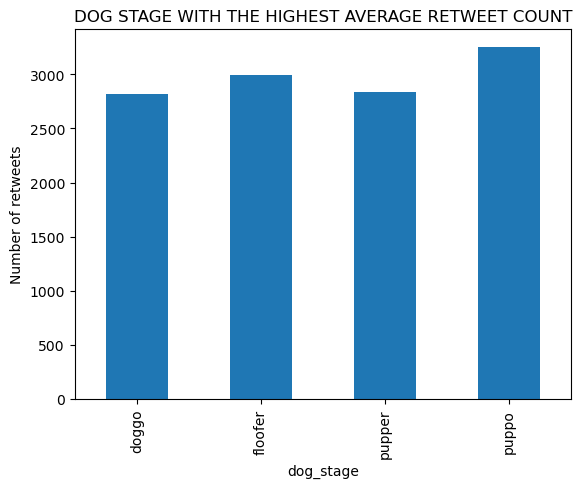

In [186]:

plt.title("Dog Stage with the highest average retweet count".upper())
plt.ylabel("Number of retweets")
new_data.groupby("dog_stage")["retweet_count"].mean().plot(kind = "bar");

The puppo stage of the dogs are the dogs that get the highest retweets among the dogs on the WeRateDogs twitter account. People consider this stage to be the cutest stage of the dog stage, this stage is followed by the floofer stage in rank

### 2 which dog stage has the most  average favorite count(likes)

In [187]:
#2 which dog stage has the most  average favorite count(likes)
new_data.groupby("dog_stage")["favorite_count"].mean().sort_values(ascending=False)

dog_stage
puppo      8993.393822
doggo      8445.113680
floofer    8421.330116
pupper     8367.250965
Name: favorite_count, dtype: float64

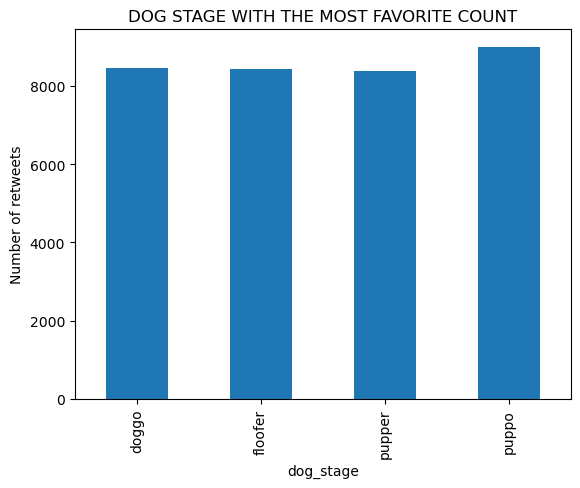

In [188]:
# which dog stage has the most  average favorite count(likes)
plt.title("Dog Stage with the most favorite count".upper())
plt.ylabel("Number of retweets")
new_data.groupby("dog_stage")["favorite_count"].mean().plot(kind="bar");

The Puppo stage of the dogs has 8993 likes on the average which is the most likes by any categories of dogs in the dataset, the doggo stage follows closely with8445 likes, while the floofer stage rank second with the most average retweets, it rank third on likes ranking

### 3. Which dog has the highest rating over 10

In [189]:

denominator = new_data[new_data.rating_denominator == 10]
numerator = max(denominator.rating_numerator)

In [190]:
denominator[denominator.rating_numerator == numerator]

,index,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,id,id_str,full_text,truncated,display_text_range,entities,user,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang,dog_stage
802,3208,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,Mon Jul 04 15:00:45 +0000 2016,749981277374128128,749981277374128128,This is Atticus. He's quite simply America af....,False,0-54,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,2772,5569,False,False,False,en,pupper


This individual decided to give his dog a 1776 rating over 10 making it the highest rated dog over 10, dog name is Atticus. meanwhile noneof the prediction algorithms could not classify this dog has True

### Conclusion
Data from tweet archive of the Twitter user @dog_rates also known as WeRateDogs was gathered, assessed, cleaned and analysed in this project. The data was gathered from three different sources, 1. through direct download, 2. Through api using the request module 3. Through external API using token. the data was assessed visually and programmatically to discover and highlight variou quality and tidiness issues in the data, The data was later cleaned using various Pandas methods. The cleaned data was later merged into a master dataframe which was used for analysis and visualization among which include, the dog stage with the highest retweets and likes.

#### REFRENCES
[https://stackoverflow.com/questions/72673587/pandas-melt-duplication-issue]
[https://stackoverflow.com/questions/9760588/how-do-you-extract-a-url-from-a-string-using-python]
[https://stackoverflow.com/questions/68412800/tweeperror-attribute-error-when-using-tweepy]